<a href="https://colab.research.google.com/github/Leonardo08x/matematica-computacional-2025.4/blob/main/atividade_2_mc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt


In [54]:
def somas(intercept,slope):
    sum1, sum2 ,sum3 = (1.4-(intercept+slope*0.5)), (1.9-(intercept+slope*2.3)), (3.2-(intercept+slope*2.9))
    return sum1, sum2 ,sum3

def ssr(sum1, sum2, sum3):
    return sum1**2 + sum2**2 + sum3**2

def gradiente_intercept(sum1, sum2, sum3):
    N = 3
    soma_erros = sum1 + sum2 + sum3
    return (-2 / N) * soma_erros

def gradiente_slope(sum1, sum2, sum3):
    N = 3
    soma_gradientes = (sum1 * 0.5) + (sum2 * 2.3) + (sum3 * 2.9)
    return (-2 / N) * soma_gradientes

def plotagem(intercept, slope):
    pontos_x, pontos_y = np.array([0.5, 2.3, 2.9]), np.array([1.4, 1.9, 3.2])

    X,Y = pontos_x, pontos_y

    Y_previsto = intercept + slope * X

    plt.figure(figsize=(10, 6))

    plt.scatter(X, Y, color='blue', label='Dados Originais', marker='o')

    plt.plot(X, Y_previsto, color='red', linewidth=2,
             label=f'Reta de Regressão: Y = {intercept:.3f} + {slope:.3f}X')

    plt.title('Gráfico de Regressão Linear')
    plt.xlabel('Pontos X')
    plt.ylabel('Pontos Y')

    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()
def slope_fixo(intercept,interações,slope,learning_hate,numero_de_iteracoes,limite):
    while interações < numero_de_iteracoes and abs(intercept) < limite:
        sum1, sum2 ,sum3 = somas(intercept,slope)
        gradiente_resultado,ssr_resultado = gradiente_intercept(sum1,sum2,sum3), ssr(sum1,sum2,sum3)
        intercept = intercept - learning_hate*gradiente_resultado
        interações += 1
    plotagem(intercept,slope)
def slope_dinamico(intercept,interações,slope,learning_hate,numero_de_iteracoes,limite):
    while interações < numero_de_iteracoes and abs(intercept) < limite and abs(slope)<limite :
        sum1, sum2 ,sum3 = somas(intercept,slope)
        gradiente_resultado,ssr_resultado,gradiente_slope_resultado = gradiente_intercept(sum1,sum2,sum3), ssr(sum1,sum2,sum3),gradiente_slope(sum1,sum2,sum3)
        intercept = intercept - learning_hate*gradiente_resultado
        slope = slope - learning_hate*gradiente_slope_resultado
        interações += 1
        print("\nintercept atual é: \t",intercept)
        print("slope atual é: \t",slope)
        print("interações: \t",interações)
    plotagem(intercept,slope)

def gradiente_ponto_intercept(x, y, intercept, slope):
    residuo = y - (intercept + slope * x)
    return -2 * residuo

def gradiente_ponto_slope(x, y, intercept, slope):
    residuo = y - (intercept + slope * x)
    return -2 * x * residuo

def sgd_estocastico(intercept, slope, learning_rate, numero_de_iteracoes):
    pontos = [(0.5, 1.4), (2.3, 1.9), (2.9, 3.2)]

    for epoca in range(numero_de_iteracoes):

        for x, y in pontos:

            grad_int,grad_slo = gradiente_ponto_intercept(x, y, intercept, slope), gradiente_ponto_slope(x, y, intercept, slope)

            intercept = intercept - learning_rate * grad_int
            slope = slope - learning_rate * grad_slo

    print(f"\n--- Fim da Época {epoca + 1} (SGD) ---")
    print(f"intercept final: \t {intercept:.4f}")
    print(f"slope final: \t\t {slope:.4f}")
    plotagem(intercept,slope)

def minibatch_gradient_descent(intercept, slope, learning_rate, numero_de_iteracoes, batch_size):
    pontos = [(0.5, 1.4), (2.3, 1.9), (2.9, 3.2)]
    data = np.array(pontos)
    N = len(data)

    for epoca in range(numero_de_iteracoes):
        np.random.shuffle(data)

        for i in range(0, N, batch_size):
            batch = data[i:i + batch_size]
            current_batch_size = len(batch)

            grad_int_sum = 0.0
            grad_slo_sum = 0.0

            for x, y in batch:
                grad_int_sum += gradiente_ponto_intercept(x, y, intercept, slope)
                grad_slo_sum += gradiente_ponto_slope(x, y, intercept, slope)

            grad_int_medio = grad_int_sum / current_batch_size
            grad_slo_medio = grad_slo_sum / current_batch_size

            intercept = intercept - learning_rate * grad_int_medio
            slope = slope - learning_rate * grad_slo_medio

    print(f"\n--- Fim da Época {epoca + 1} (Mini-Batch) ---")
    print(f"intercept final: \t {intercept:.4f}")
    print(f"slope final: \t\t {slope:.4f}")
    plotagem(intercept, slope)

def regressao_linear(intercept_inicial,slope_inicial, learning_hate, numero_de_iteracoes, limite,tipo):
  intercept,interações,slope = intercept_inicial,0,slope_inicial
  if tipo == 0:
    slope_fixo(intercept,interações,slope,learning_hate,numero_de_iteracoes,limite)
  elif tipo == 1:
    slope_dinamico(intercept,interações,slope,learning_hate,numero_de_iteracoes,limite)
  elif tipo == 2:
        sgd_estocastico(intercept, slope, learning_hate, numero_de_iteracoes)
  elif tipo == 3:
        batch_size = 2
        minibatch_gradient_descent(intercept, slope, learning_hate, numero_de_iteracoes, batch_size)


def softplus(z):
    return np.log(1 + np.exp(z))
def rede_burral(chute_inicial):
  b3 = chute_inicial
  learning_rate = 0.01
  pontos= [0,0.5,1]
  stepsize = -100
  while abs(stepsize) >= 0.001:
    output = []
    for ponto in pontos:
            z1 = (ponto * 3.34) - 1.43
            saida_neuronio1 = softplus(z1)
            burronio1 = saida_neuronio1 * (-1.22)

            z2 = (ponto * -3.53) + 0.57
            saida_neuronio2 = softplus(z2)
            burronio2 = saida_neuronio2 * (-2.30)

            output.append(burronio1 + burronio2 + b3)
    slope = -2*(0-output[0])*1 + -2*(1-output[1])*1 + -2*(0-output[2])*1
    stepsize = learning_rate*slope
    b3 = b3 - stepsize
    print(f"Predições (Output): \t {output}")
    print(f"Bias b3: \t\t {b3:.8f}")
    print(f"Step Size (Parada): \t {stepsize:.10f}")
def rede_burral_backburration(chute_b3,chute_w3,chute_w4):
  b3 = chute_b3
  w3 = chute_w3
  w4 = chute_w4
  learning_rate = 0.01
  pontos= [0,0.5,1]
  stepsize = -100
  while abs(stepsize) >= 0.001:
    output,output_burronio1,output_burronio2 = [],[],[]
    for ponto in pontos:
            z1 = (ponto * 3.34) - 1.43
            saida_neuronio1 = softplus(z1)
            output_burronio1.append(saida_neuronio1)
            burronio1 = saida_neuronio1 * (w3)

            z2 = (ponto * -3.53) + 0.57
            saida_neuronio2 = softplus(z2)
            output_burronio2.append(saida_neuronio2)
            burronio2 = saida_neuronio2 * (w4)

            output.append(burronio1 + burronio2 + b3)
    slope = -2*(0-output[0])*1 + -2*(1-output[1])*1 + -2*(0-output[2])*1
    slope_w3 = -2*(0-output[0])*output_burronio1[0] + -2*(1-output[1])*output_burronio1[1] + -2*(0-output[2])*output_burronio1[2]
    slope_w4 = -2*(0-output[0])*output_burronio2[0] + -2*(1-output[1])*output_burronio2[1] + -2*(0-output[2])*output_burronio2[2]
    stepsize = learning_rate*slope
    stepsize_w3 = learning_rate*slope_w3
    stepsize_w4 = learning_rate*slope_w4
    b3,w3,w4 = b3 - stepsize,w3 - stepsize_w3,w4 - stepsize_w4
    print(f"Peso W3: \t\t {w3:.8f}")
    print(f"Peso W4: \t\t {w4:.8f}")
    print(f"Bias b3: \t\t {b3:.8f}")
    print(f"Step Size (B3): \t {stepsize:.10f}")
    print(f"Predições (Output): \t {output}")
    print("---------------------------------")




A função `slope_fixo` implementa o algoritmo de **Descida do Gradiente (Gradient Descent)** com o objetivo de encontrar o valor ótimo do **intercept** , mantendo o **coeficiente angular** (slope= 0.640) fixo. A teoria se baseia em minimizar o **Somatório dos Quadrados dos Resíduos (SSR)**, que é a função de custo que mede o quão bem a reta se ajusta aos dados. Em cada iteração, a função calcula o **gradiente** (a derivada parcial do SSR em relação ao intercept) e, em seguida, ajusta o valor do intercept subtraindo o produto do gradiente pela **taxa de aprendizado** (`learning_hate`). Esse processo iterativo move o intercept em direção ao mínimo global da função de custo para aquele slope específico. O resultado final, como visto no gráfico, é a reta de regressão **$Y = 0.942 + 0.640X$**. Esse intercept de **$0.942$** é o valor que minimiza o erro quadrado total para os pontos de dados, dada a restrição de que o slope deve ser $0.640$. O gráfico finaliza a visualização do melhor ajuste encontrado para esta configuração de parâmetros.

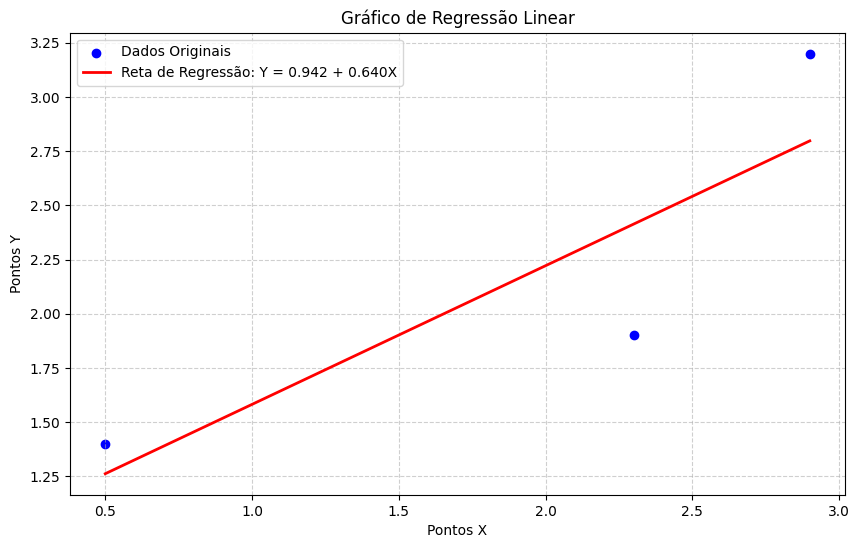

In [49]:
regressao_linear(0,0.64,0.1,1000,0.94,0)

A função `slope_dinamico` executa a **Descida do Gradiente (Gradient Descent)** completa, otimizando **simultaneamente** o **intercept**  e o **slope**  diferente da versão fixa que só ajustava o intercept. Este método busca minimizar o **Somatório dos Quadrados dos Resíduos (SSR)** calculando os gradientes (derivadas parciais do SSR) em relação a ambos os parâmetros, usando a **taxa de aprendizado** (`learning_hate`) para atualizar iterativamente o intercept e o slope em direção ao mínimo global da função de custo. O processo para quando atinge o número de interações ou limites estabelecidos, resultando na linha de melhor ajuste, que no gráfico é **$Y = 0.000 + 1.000X$**, a reta que minimiza o SSR para os pontos fornecidos.

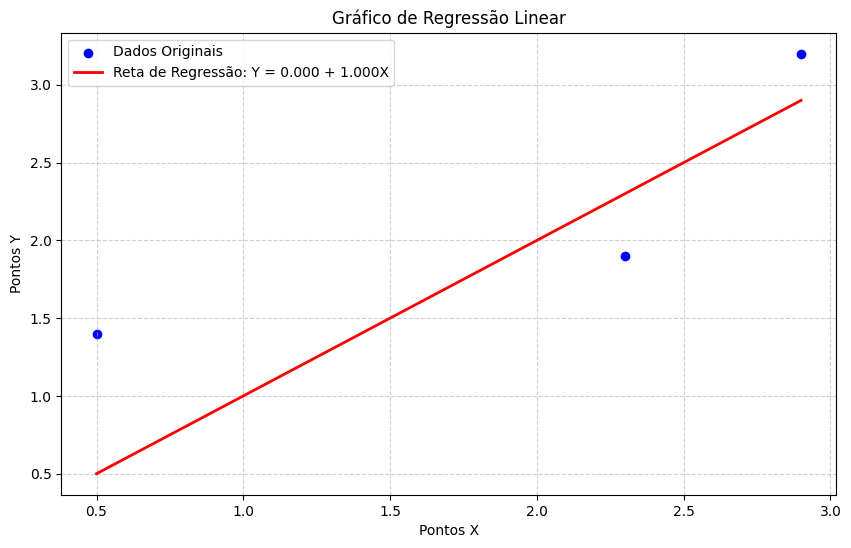

In [50]:
regressao_linear(0,1,0.01,1000,0.94,1)


A análise da Regressão Linear envolve duas variações principais da Descida do Gradiente: o SGD Estocástico (tipo 2) e o Mini-Batch Gradient Descent (tipo 3). A diferença crucial reside na determinação do gradiente para atualização dos parâmetros ($intercept$ e $slope$): o **SGD Estocástico** utiliza o gradiente calculado a partir de **apenas um ponto de dado** em cada passo, garantindo velocidade de processamento, mas gerando um caminho de otimização ruidoso e de alta variância que oscila em torno do mínimo . Em contraste, o **Mini-Batch Gradient Descent** calcula o gradiente médio sobre um pequeno lote de dados (com $batch\_size=2$ neste caso), promovendo uma convergência mais estável e eficiente por reduzir o ruído do SGD. Ao comparar as duas soluções gráficas obtidas para os mesmos três pontos, observa-se que o **primeiro resultado** ($Y = 0.210 + 1.454X$) possui uma inclinação acentuada, sugerindo que o processo de otimização pode ter sido interrompido prematuramente ou ter sido altamente influenciado pelo ponto de maior valor, resultando em superestimação do crescimento. O **segundo resultado** ($Y = 0.957 + 0.814X$), com inclinação mais suave, representa um ajuste que distribui o erro de forma mais uniforme sobre os pontos, indicando uma provável convergência mais próxima da solução exata de Mínimos Quadrados.


--- Fim da Época 1000 (SGD) ---
intercept final: 	 0.2102
slope final: 		 1.4535


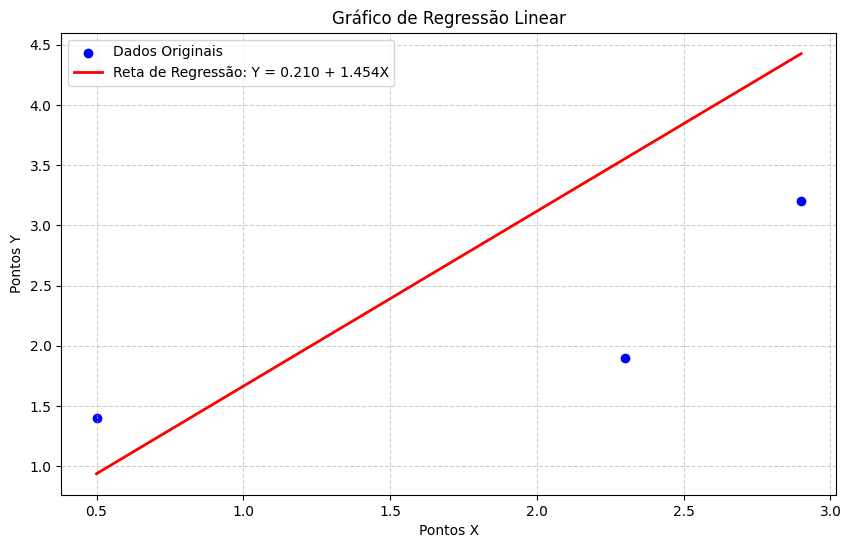


--- Fim da Época 1000 (Mini-Batch) ---
intercept final: 	 0.9202
slope final: 		 0.8322


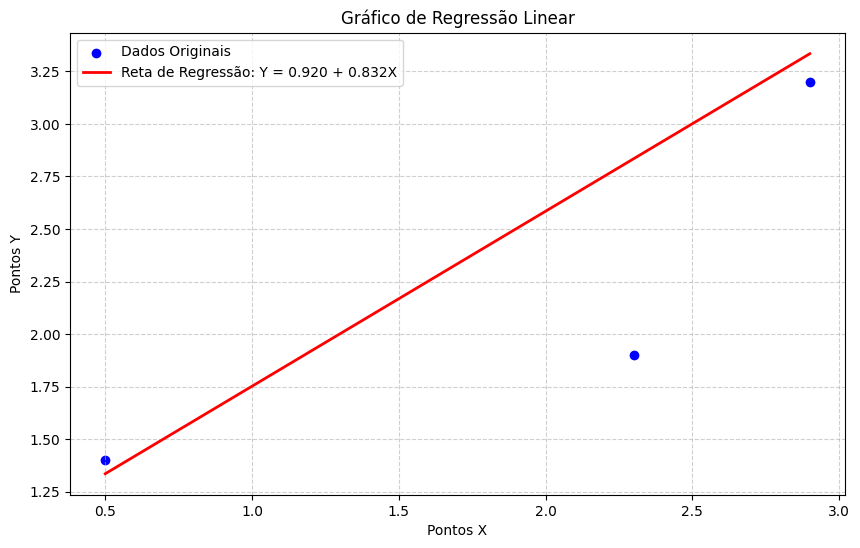

In [51]:
regressao_linear(0,0.64,0.1,1000,0.94,2)

regressao_linear(0,0.64,0.1,1000,0.94,3)



A função "rede burral" implementa uma **Rede Neural (Neural Network)** com uma única entrada, uma camada oculta de dois neurônios que utiliza a função de ativação **Softplus** $f(z) = \log(1 + e^z)$, e um neurônio de saída com ativação linear. O objetivo primordial é ajustar iterativamente o **bias** $b_3$ do neurônio de saída, sendo este o único parâmetro variável, utilizando o **Gradiente Descendente (Gradient Descent)**. O treinamento busca minimizar a **Função de Perda (Loss Function)**, que é o Erro Quadrático Médio (MSE), para que a rede mapeie as entradas $[0, 0.5, 1]$ para os alvos $[0, 1, 0]$. O laço `while` executa as épocas de treinamento, onde a rede calcula a saída para cada ponto (passo *Feedforward*), calcula a derivada da perda em relação a $b_3$ (**slope**) no passo *Backpropagation*, e atualiza $b_3$ subtraindo o **stepsize** (taxa de aprendizado $\times$ slope), com o processo encerrando quando o `stepsize` for inferior a $0.001$, indicando a convergência.

In [53]:
rede_burral(0)

Predições (Output): 	 [np.float64(-2.6036652380594103), np.float64(-1.6090193181937855), np.float64(-2.6148696340356787)]
Bias b3: 		 0.15655108
Step Size (Parada): 	 -0.1565510838
Predições (Output): 	 [np.float64(-2.447114154253633), np.float64(-1.452468234388008), np.float64(-2.4583185502299014)]
Bias b3: 		 0.30370910
Step Size (Parada): 	 -0.1471580188
Predições (Output): 	 [np.float64(-2.2999561354762017), np.float64(-1.3053102156105771), np.float64(-2.3111605314524706)]
Bias b3: 		 0.44203764
Step Size (Parada): 	 -0.1383285377
Predições (Output): 	 [np.float64(-2.161627597825417), np.float64(-1.1669816779597921), np.float64(-2.1728319938016853)]
Bias b3: 		 0.57206647
Step Size (Parada): 	 -0.1300288254
Predições (Output): 	 [np.float64(-2.031598772433679), np.float64(-1.0369528525680543), np.float64(-2.0428031684099475)]
Bias b3: 		 0.69429356
Step Size (Parada): 	 -0.1222270959
Predições (Output): 	 [np.float64(-1.9093716765654454), np.float64(-0.9147257566998206), np.float64

a função rede_burral_backburration implementa um processo de **backpropagation (retropropagação)** simplificado para uma rede neural de camada única (embora com dois neurônios "fixos" na camada oculta, cujos pesos e *bias* de entrada são fixos). O objetivo é ajustar os pesos $w_3$ e $w_4$ e o *bias* $b_3$ para que a saída da rede se aproxime dos valores alvo: 0 para a entrada 0, 1 para a entrada 0.5 e 0 para a entrada 1. A função $\text{softplus}(z) = \ln(1 + e^z)$ é usada como função de ativação na camada oculta. O ajuste é feito através de **descida do gradiente**, onde o $\text{stepsize}$ (tamanho do passo) é calculado multiplicando a $\text{learning_rate}$ (taxa de aprendizado) pelo gradiente da função de custo (erro quadrático médio) em relação a cada parâmetro. O laço de repetição continua até que a magnitude do $\text{stepsize}$ para $b_3$ caia abaixo de 0.001.

In [55]:
rede_burral_backburration(0,0.36,0.63)

Peso W3: 		 0.33423860
Peso W4: 		 0.61743238
Bias b3: 		 -0.01899555
Step Size (B3): 	 0.0189955467
Predições (Output): 	 [np.float64(0.7187189573236643), np.float64(0.4619172915129107), np.float64(0.7691410842469864)]
---------------------------------
Peso W3: 		 0.31231556
Peso W4: 		 0.60592770
Bias b3: 		 -0.03492783
Step Size (B3): 	 0.0159322798
Predições (Output): 	 [np.float64(0.6813995786611375), np.float64(0.4184654920766649), np.float64(0.696748919045033)]
---------------------------------
Peso W3: 		 0.29365333
Peso W4: 		 0.59533934
Bias b3: 		 -0.04824565
Step Size (B3): 	 0.0133178218
Predições (Output): 	 [np.float64(0.6490493127031213), np.float64(0.3815067617305842), np.float64(0.6353350169396591)]
---------------------------------
Peso W3: 		 0.27776037
Peso W4: 		 0.58554211
Bias b3: 		 -0.05933137
Step Size (B3): 	 0.0110857237
Predições (Output): 	 [np.float64(0.6209461383476128), np.float64(0.350079742535854), np.float64(0.583260303090173)]
---------------------